In [22]:
using JLD, SharedArrays

In [23]:
z = load("lyapgrid.jld")
v = z["lyapunov_grid"]

61×101 Matrix{Float64}:
 0.693116   0.675744    0.668653  …   0.500107   0.499745   0.497681
 0.693077   0.670832    0.662695      0.469129   0.465323   0.466929
 0.692998   0.665592    0.655988      0.437565   0.438303   0.436292
 0.692873   0.659807    0.648597      0.405888   0.405615   0.40571
 0.692739   0.653582    0.639918      0.367681   0.370957   0.372988
 0.695993   0.646686    0.628865  …   0.34029    0.337691   0.335028
 0.694592   0.639535    0.616308      0.307241   0.301286   0.308167
 0.692183   0.631406    0.605351      0.265045   0.272275   0.271066
 0.696615   0.622645    0.593311      0.238135   0.243718   0.241968
 0.700814   0.61436     0.582648      0.20801    0.207449   0.206718
 ⋮                                ⋱                         ⋮
 2.53926   -0.0392555  -0.686091     -1.03371   -1.07049   -1.08638
 2.56585   -0.0661739  -0.710971     -1.12148   -1.06565   -1.14454
 2.59798   -0.102902   -0.73343      -1.10671   -1.08121   -1.15224
 2.61794   -0.137182 

In [24]:
using Interpolations

In [25]:
itp = interpolate(v, BSpline(Cubic(Line(OnGrid()))))

61×101 interpolate(OffsetArray(::Matrix{Float64}, 0:62, 0:102), BSpline(Cubic(Line(OnGrid())))) with element type Float64:
 0.693116   0.675744    0.668653  …   0.500107   0.499745   0.497681
 0.693077   0.670832    0.662695      0.469129   0.465323   0.466929
 0.692998   0.665592    0.655988      0.437565   0.438303   0.436292
 0.692873   0.659807    0.648597      0.405888   0.405615   0.40571
 0.692739   0.653582    0.639918      0.367681   0.370957   0.372988
 0.695993   0.646686    0.628865  …   0.34029    0.337691   0.335028
 0.694592   0.639535    0.616308      0.307241   0.301286   0.308167
 0.692183   0.631406    0.605351      0.265045   0.272275   0.271066
 0.696615   0.622645    0.593311      0.238135   0.243718   0.241968
 0.700814   0.61436     0.582648      0.20801    0.207449   0.206718
 ⋮                                ⋱                         ⋮
 2.53926   -0.0392555  -0.686091     -1.03371   -1.07049   -1.08638
 2.56585   -0.0661739  -0.710971     -1.12148   -1.06565  

In [26]:
alphas = 2:0.1:8
epsilons = 0:0.01:1.0

0.0:0.01:1.0

In [27]:
sitp = scale(itp, alphas, epsilons)

61×101 scale(interpolate(OffsetArray(::Matrix{Float64}, 0:62, 0:102), BSpline(Cubic(Line(OnGrid())))), (2.0:0.1:8.0, 0.0:0.01:1.0)) with element type Float64:
 0.693116   0.675744    0.668653  …   0.500107   0.499745   0.497681
 0.693077   0.670832    0.662695      0.469129   0.465323   0.466929
 0.692998   0.665592    0.655988      0.437565   0.438303   0.436292
 0.692873   0.659807    0.648597      0.405888   0.405615   0.40571
 0.692739   0.653582    0.639918      0.367681   0.370957   0.372988
 0.695993   0.646686    0.628865  …   0.34029    0.337691   0.335028
 0.694592   0.639535    0.616308      0.307241   0.301286   0.308167
 0.692183   0.631406    0.605351      0.265045   0.272275   0.271066
 0.696615   0.622645    0.593311      0.238135   0.243718   0.241968
 0.700814   0.61436     0.582648      0.20801    0.207449   0.206718
 ⋮                                ⋱                         ⋮
 2.53926   -0.0392555  -0.686091     -1.03371   -1.07049   -1.08638
 2.56585   -0.0661739 

In [28]:
using Plots, LaTeXStrings

In [29]:
levels = [x for x in -2:0.2:0.6]

14-element Vector{Float64}:
 -2.0
 -1.8
 -1.6
 -1.4
 -1.2
 -1.0
 -0.8
 -0.6
 -0.4
 -0.2
  0.0
  0.2
  0.4
  0.6

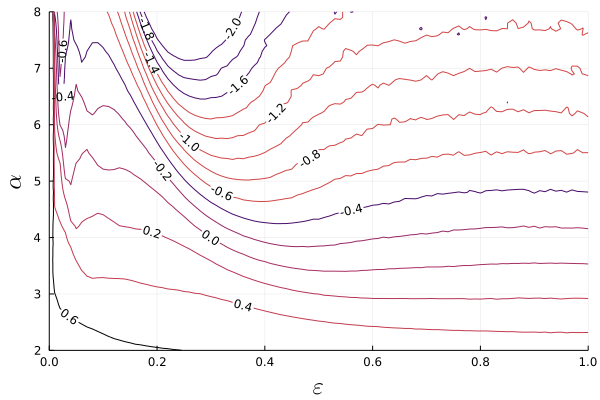

In [30]:
plot(epsilons,
alphas,
sitp, 
levels = levels, 
xaxis = L"\epsilon", 
yaxis = L"\alpha", 
contour_labels= true, 
guidefontsize = 16,
legend = :none)

In [34]:
plotattr(:Axis)

Defined Axis attributes are:
discrete_values, draw_arrow, flip, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_guide, foreground_color_minor_grid, foreground_color_text, formatter, grid, gridalpha, gridlinewidth, gridstyle, guide, guide_position, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, lims, link, minorgrid, minorgridalpha, minorgridlinewidth, minorgridstyle, minorticks, mirror, rotation, scale, showaxis, tick_direction, tickfontcolor, tickfontfamily, tickfonthalign, tickfontrotation, tickfontsize, tickfontvalign, ticks, widen


In [31]:
savefig("lyapcontours.png")